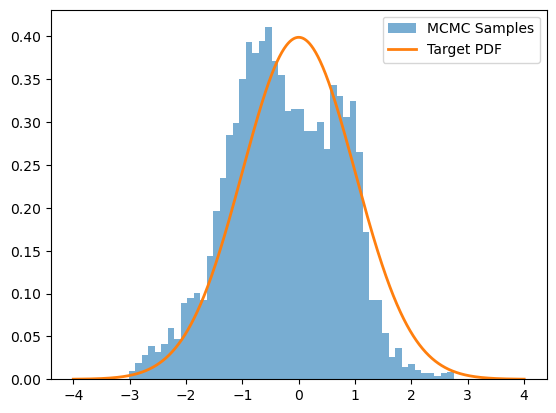

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Standard Normal N(0,1)
def target_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# MCMC parameters
num_samples = 10000
samples = np.zeros(num_samples)
current = 0  # Start at x=0

for i in range(1, num_samples):
    proposal = current + np.random.normal(0, 0.1)  # Small Gaussian step
    # Metropolis-Hastings acceptance ratio
    acceptance_ratio = min(1, target_pdf(proposal) / target_pdf(current))
    #acceptance_ratio = min(1, 1)
    if np.random.rand() < acceptance_ratio:
        current = proposal
    samples[i] = current

# Plot the histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.6, label="MCMC Samples")
x = np.linspace(-4, 4, 1000)
plt.plot(x, target_pdf(x), label="Target PDF", linewidth=2)
plt.legend()
plt.show()
